# Styles and formatting

## Setup

### Imports

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Sample data

In [3]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

Optionally set the design theme

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [5]:
SHOW = False

## Colors

### Line colors

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of line (and marker) colors.  This color pattern repeats indefinetly in case the number of plotted lines exceeds the length of the built-in list.

#### Built-in color list

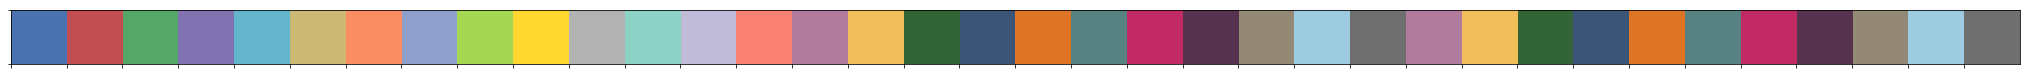

In [9]:
from fivecentplots.layout import DEFAULT_COLORS
sns.palplot(sns.color_palette(DEFAULT_COLORS))

I [A] vs Voltage.png


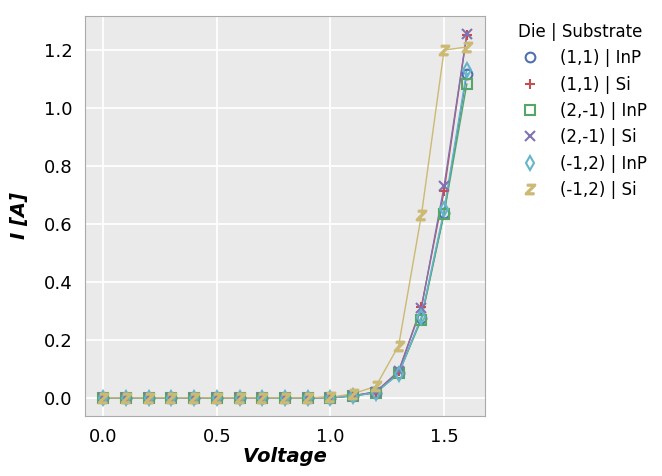

In [13]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Custom color list

The built-in list of colors can be overriden by passing a list of hex-based color codes to the `colors` keyword.  Like the built-in list, the custom list will also cycle back to the start if there are more lines than colors.

I [A] vs Voltage.png


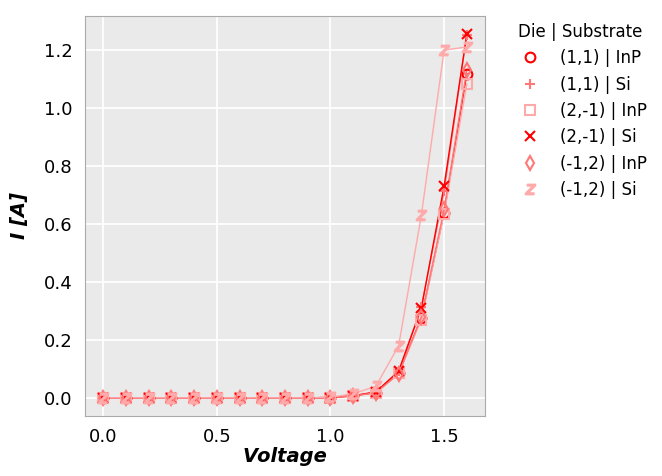

In [17]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=['#FF0000', '#FF7777', '#FFAAAA'])

#### Colormap

The color list can also be replaced by a discretized colormap using the keyword `cmap`

I [A] vs Voltage.png


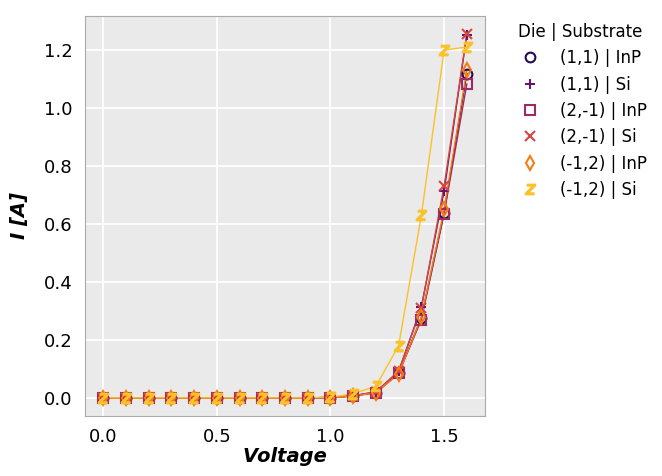

In [18]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         cmap='inferno')

### Fill colors

Many elements in a plot are capable of having a fill color (axes, figure background, markers, etc.).  These fill colors are accessible using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_color`. 

I [A] vs Voltage.png


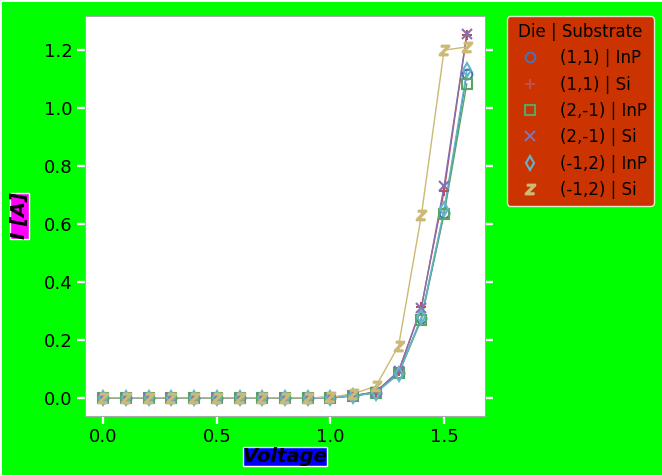

In [22]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', legend_fill_color='#FF0000', ax_fill_color='#FFFFFF',
         label_x_fill_color='#0000FF', label_y_fill_color='#FF00FF')

### Edge colors

Many elements in a plot also support an edge color (i.e., the border around an object).  These edge colors are accessible using the standard keyword nomenclature of the element name followed by an underscore and the keyword `edge_color`. 

I [A] vs Voltage.png


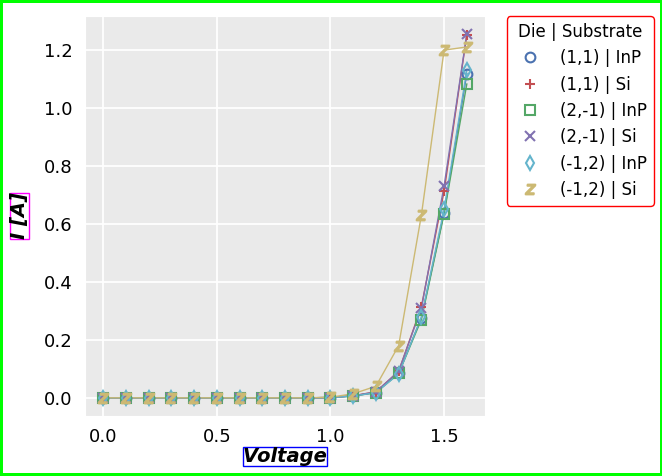

In [53]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_edge_color='#00FF00', legend_edge_color='#FF0000', ax_edge_color='#FFFFFF',
         label_x_edge_color='#0000FF', label_y_edge_color='#FF00FF')

### Alpha

Elements also support alpha for transparency.  By default alpha=1 for all elements, but can be changed using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_alpha` or `edge_alpha`.

I [A] vs Voltage.png


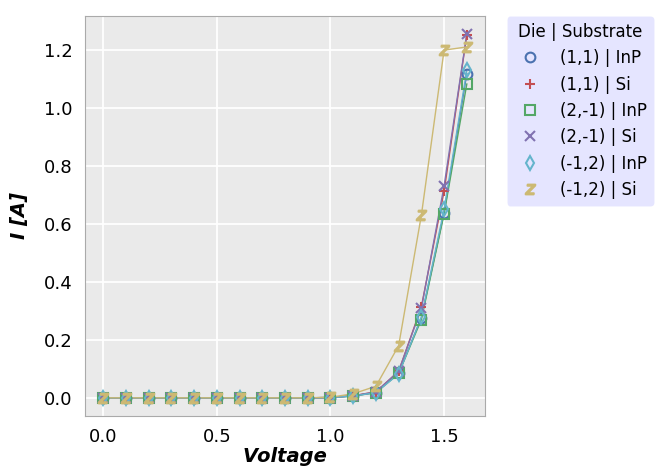

In [35]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         legend_fill_color='#0000FF', legend_fill_alpha=0.1)

Plot line alpha can also be set using the `lines_alpha` keyword

I [A] vs Voltage.png


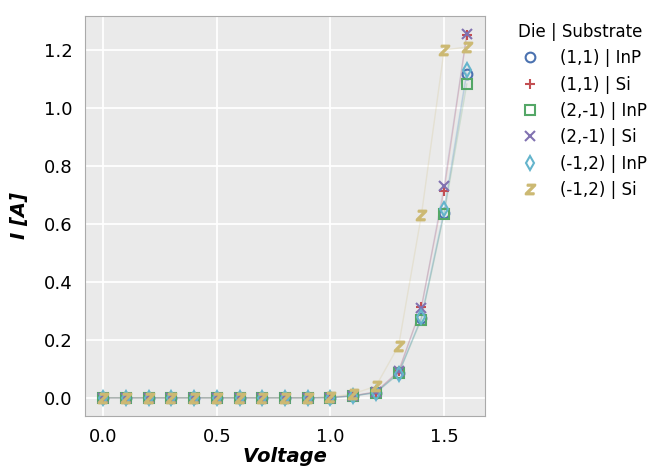

In [38]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         lines_alpha=0.2)

## Markers

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of marker styles:

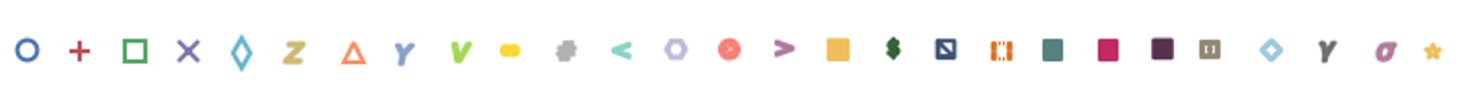

In [55]:
from IPython.display import Image
Image('../doc/_static/images/markers.png')

You can specify your own markers by passing a list of marker string names to the `markers` keyword.  As with colors, the marker list will loop back on itself if the number of curves exceeds the number of items in the list.

I [A] vs Voltage.png


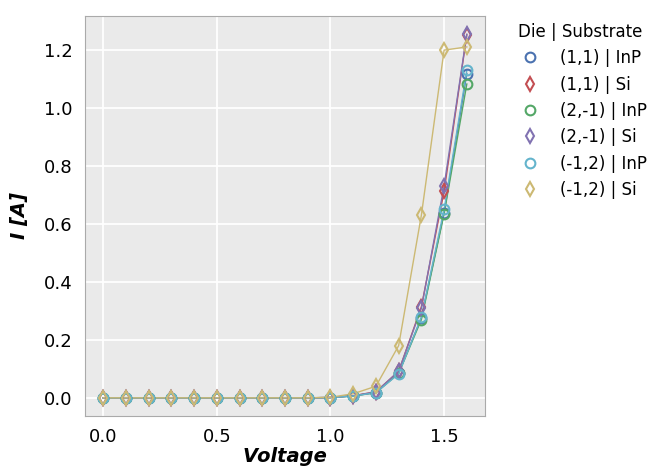

In [57]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         markers=['o', 'd'])

## Fonts

All text elements (plot title, labels, etc.) can be styled via the font attributes associated with the object (see <a href=https://endangeredoxen.github.io/fivecentplots/keyword.html#default-attributes>Default Attributes).

In [62]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         title='My Plot', title_font_style='italic', 
         label_y_font_size=25, label_y_style='normal',
         label_x_font_weight='normal',
         tick_labels_major_font='fantasy')

> c:\github\fivecentplots\fivecentplots\layout.py(318)__init__()
-> if 'ticks' in kwargs.keys() and 'ticks_minor' not in kwargs.keys():
(Pdb) self.tick_labels_major.font
'fantasy'
(Pdb) q


BdbQuit: 